# Artivatic Data Labs Pvt. Ltd.

### Problem Statement
    The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
    After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
    This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan application. Keep this in mind while understanding data.
    In this challenge, you will help this bank by predicting the probability that a member will default.


### Evaluation Metric
Submissions will be evaluated based on AUC-ROC score.

### Data Information
    There are files given: train, test and submission. Your submission file must adhere to the format specified in the given submission file. This data set comprises information captured in December 2016. Following is the description of variables given:

|Sr.No. ||Variable || Description|
|:-----||:--------||:-----------|
|1.||member_id || unique ID assigned to each member|
|2.|| loan_amnt   || loan amount (\$) applied by the member|
|3.|| funded_amnt  || loan amount (\$) sanctioned by the bank|
|4.|| funded_amnt_inv  || loan amount (\$) sanctioned by the investors|
|5.|| term    || term of loan (in months)|
|6.|| batch_enrolled   || batch numbers allotted to members|
|7.|| int_rate    || interest rate (\%) on loan|
|8.|| grade     ||  grade assigned by the bank|
|9.|| sub_grade  || grade assigned by the bank|
|10.|| emp_title   || job / Employer title of member|
|11.|| emp_length   ||  employment length, where 0 means less than one year and 10 means ten or more years|
|12.|| home_ownership   ||  status of home ownership|
|13.|| annual_inc     ||  annual income ($) reported by the member|
|14.|| verification_status   ||  status of income verified by the bank|
|15.|| pymnt_plan    ||  indicates if any payment plan has started against loan|
|16.|| desc     ||  loan description provided by member|
|17.|| purpose   ||  purpose of loan|
|18.|| title     ||  loan title provided by member|
|19.|| zip_code   ||  first three digits of area zipcode of member|
|20.|| addr_state   ||  living state of member|
|21.|| dti   ||  ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income|
|22.|| delinq_2yrs  ||   number of 30+ days delinquency in past 2 years|
|23.|| inq_last_6mths  ||  number of inquiries in last 6 months|
|24.|| mths_since_last_delinq    ||  number of months since last delinq|
|25.|| mths_since_last_record     ||  number of months since last public record|
|26.|| open_acc   ||  number of open credit line in member's credit line|
|27.|| pub_rec    ||  number of derogatory public records|
|28.|| revol_bal    ||  total credit revolving balance|
|29.|| revol_util    ||  amount of credit a member is using relative to revol_bal|
|30.|| total_acc      ||  total number of credit lines available in members credit line|
|31.|| initial_list_status    ||  unique listing status of the loan - W(Waiting), F(Forwarded)|
|32.|| total_rec_int      ||  interest received till date|
|33.|| total_rec_late_fee     ||  Late fee received till date |
|34.|| recoveries ||  post charge off gross recovery|
|35.|| collection_recovery_fee  || post charge off collection fee
|36.|| collections_12_mths_ex_med  || number of collections in last 12 months excluding medical collections|
|37.|| mths_since_last_major_derog  || months since most recent 90 day or worse rating|
|38.|| application_type    ||  indicates when the member is an individual or joint|
|39.|| verification_status_joint    ||  indicates if the joint members income was verified by the bank|
|40.|| last_week_pay     ||  indicates how long (in weeks) a member has paid EMI after batch enrolled|
|41.|| acc_now_delinq    ||  number of accounts on which the member is delinquent|
|42.|| tot_coll_amt       ||  total collection amount ever owed|
|43.|| tot_cur_bal         ||  total current balance of all accounts|
|44.|| total_rev_hi_lim    || total revolving credit limit|
|45.|| loan_status        ||  status of loan amount, 1 = Defaulter, 0 = Non Defaulters|


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv("train_indessa.csv")
test_df = pd.read_csv("test_indessa.csv")
print("Dimension of training data is: ",train_df.shape)
print("Dimension of test data is: ",test_df.shape)

Dimension of training data is:  (532428, 45)
Dimension of test data is:  (354951, 44)


In [3]:
print("Total missing values in train data: ",train_df.isnull().sum().sum())
print("Total missing values in test data: ",test_df.isnull().sum().sum())
train_df1 = train_df.fillna(0) # replace nan values in train data with 0
test_df1 = test_df.fillna(0) # replace nan values in test data with 0
print("Again check missing values in train data: ",train_df1.isnull().sum().sum())
print("Again check missing values in test data: ",test_df1.isnull().sum().sum())

Total missing values in train data:  2380715
Total missing values in test data:  1576906
Again check missing values in train data:  0
Again check missing values in test data:  0


In [4]:
train_df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,0,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,0.0,INDIVIDUAL,0,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,0.0,INDIVIDUAL,0,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,0.0,INDIVIDUAL,0,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,0.0,INDIVIDUAL,0,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
test_df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,0.0,INDIVIDUAL,0,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,0.0,INDIVIDUAL,0,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,0,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,0.0,INDIVIDUAL,0,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,0.0,INDIVIDUAL,0,22th week,0.0,0.0,234278.0,26700.0


Droping the columns from train and test data which are irrelevant to infer loan status which are:
1. member_id
2. batch_enrolled
3. desc
4. zip_code
5. addr_state

In [6]:
train_df2 = train_df1.drop(['member_id', 'batch_enrolled', 'desc', 'zip_code', 'addr_state'], axis =1)
test_df2 = test_df1.drop(['member_id', 'batch_enrolled', 'desc', 'zip_code', 'addr_state'], axis =1)
print("Updated dimension of training data is: ",train_df2.shape)
print("Updated dimension of test data is: ",test_df2.shape)

Updated dimension of training data is:  (532428, 40)
Updated dimension of test data is:  (354951, 39)


In [7]:
print("Basic information and datatype of train data: ")
print(train_df2.info())
print("\n\nBasic information and datatype of test data: ")
print(test_df2.info())

Basic information and datatype of train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    532428 non-null  int64  
 1   funded_amnt                  532428 non-null  int64  
 2   funded_amnt_inv              532428 non-null  float64
 3   term                         532428 non-null  object 
 4   int_rate                     532428 non-null  float64
 5   grade                        532428 non-null  object 
 6   sub_grade                    532428 non-null  object 
 7   emp_title                    532428 non-null  object 
 8   emp_length                   532428 non-null  object 
 9   home_ownership               532428 non-null  object 
 10  annual_inc                   532428 non-null  float64
 11  verification_status          532428 non-null  object 
 12  pymnt_plan 

In [8]:
#Getting unique values of categorical columns
def unique_val_count(df):
    for columns in df.columns:
        if df[columns].dtype == 'object' or len(df[columns].unique())<=30:
            #unique_df = df[columns].value_counts()
            #unique_df.iloc[unique_df.index.argsort()]
            print("\nNumber of unique ", columns, " in dataset is:\n",df[columns].value_counts())
print("For train data: ")
unique_val_count(train_df2)
print("\n\n For test data: ")
unique_val_count(test_df2)

For train data: 

Number of unique  term  in dataset is:
 36 months    372793
60 months    159635
Name: term, dtype: int64

Number of unique  grade  in dataset is:
 B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64

Number of unique  sub_grade  in dataset is:
 B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int64

Number of unique  emp_title  in dataset is:
 0                                30833
Teacher                           8280
Manager                           6922
Registered Nurse                  3387
Owner                      


Number of unique  pub_rec  in dataset is:
 0.0     300545
1.0      45328
2.0       6013
3.0       1795
4.0        590
5.0        333
6.0        147
7.0         73
8.0         46
9.0         27
10.0        19
11.0         7
13.0         5
15.0         4
18.0         4
12.0         4
16.0         2
19.0         2
17.0         2
49.0         1
14.0         1
26.0         1
34.0         1
54.0         1
Name: pub_rec, dtype: int64

Number of unique  initial_list_status  in dataset is:
 f    182830
w    172121
Name: initial_list_status, dtype: int64

Number of unique  collections_12_mths_ex_med  in dataset is:
 0.0     350257
1.0       4330
2.0        316
3.0         35
4.0          8
6.0          2
10.0         1
5.0          1
20.0         1
Name: collections_12_mths_ex_med, dtype: int64

Number of unique  application_type  in dataset is:
 INDIVIDUAL    354745
JOINT            206
Name: application_type, dtype: int64

Number of unique  verification_status_joint  in dataset is:
 0        

As seen above there are some categorical attributes which has large number of unique categories such attributes can be dropped as these do not give any reflection towards target

In [9]:
large_cat_column =[]
for columns in train_df2.columns:
        if train_df2[columns].dtype == np.object and len(train_df2[columns].unique())>=30:
            large_cat_column.append(columns)
print(large_cat_column)
train_df3 = train_df2.drop(large_cat_column, axis =1)
test_df3= test_df2.drop(large_cat_column, axis =1)
print("Updated dimension of training data is: ",train_df3.shape)
print("Updated dimension of test data is: ",test_df3.shape)

['sub_grade', 'emp_title', 'title', 'last_week_pay']
Updated dimension of training data is:  (532428, 36)
Updated dimension of test data is:  (354951, 35)


Relationship between term and loan_status
loan_status       0       1
term                       
36 months    271120  101673
60 months    135481   24154
Relationship between grade and loan_status
loan_status       0      1
grade                     
A             65148  23959
B            112507  40206
C            115579  31920
D             65419  18148
E             34553   7942
F             10934   2892
G              2461    760
Relationship between emp_length and loan_status
loan_status       0      1
emp_length                
0             22403   4488
1 year        25668   8534
10+ years    136684  38421
2 years       35441  11835
3 years       31976  10199
4 years       23441   8140
5 years       24470   8923
6 years       18503   7238
7 years       19742   6938
8 years       20472   5971
9 years       15941   4747
< 1 year      31860  10393
Relationship between home_ownership and loan_status
loan_status          0      1
home_ownership               
ANY                  2

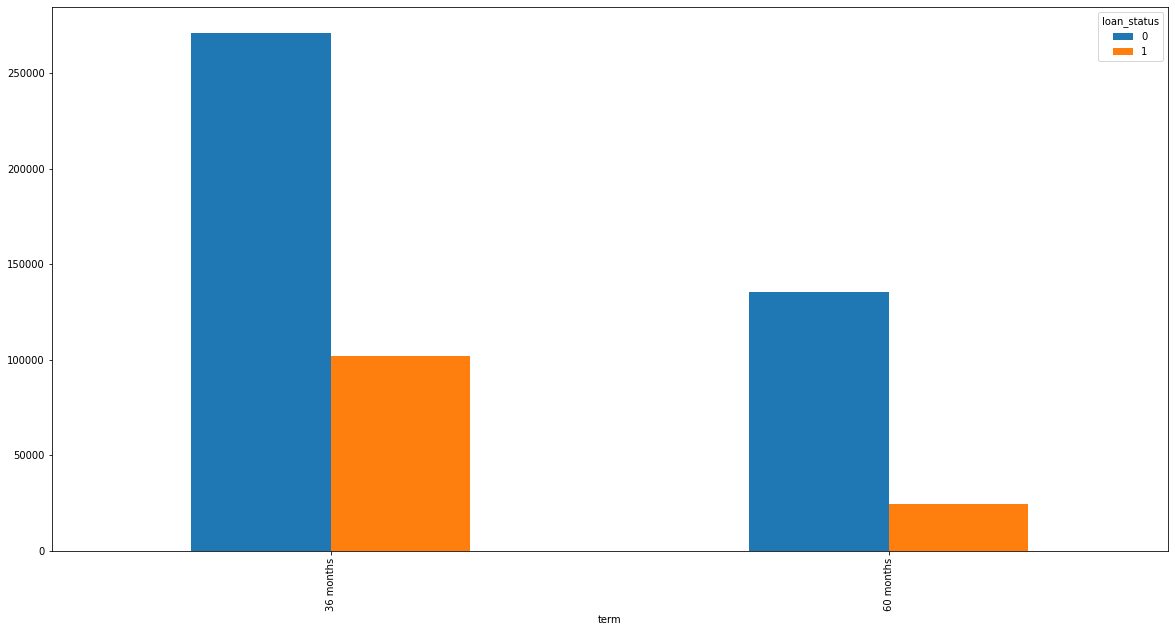

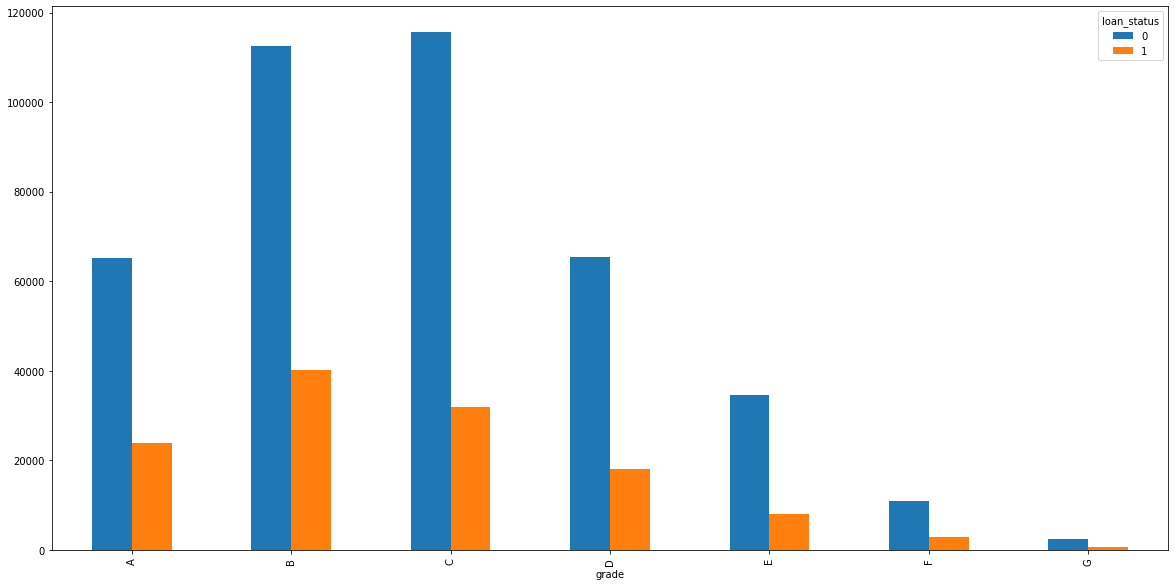

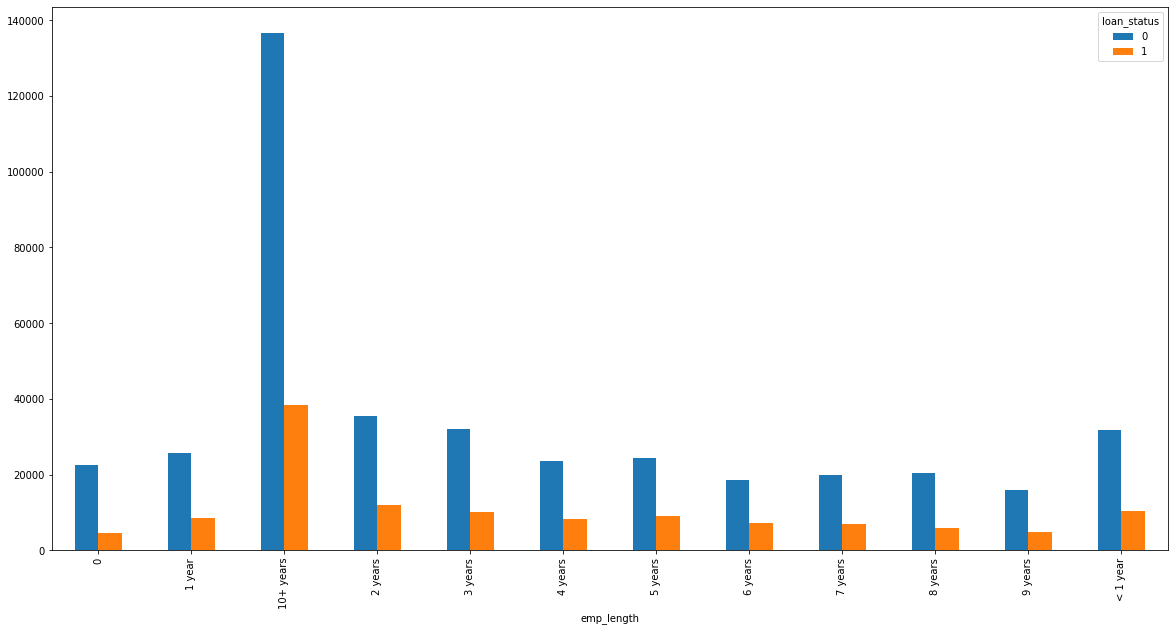

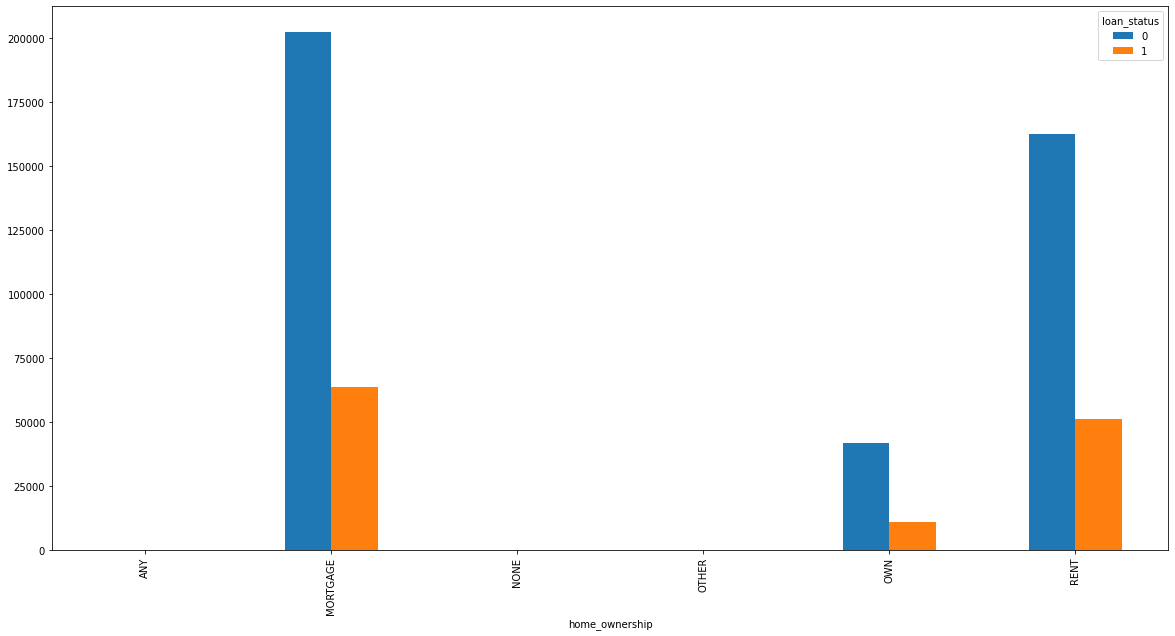

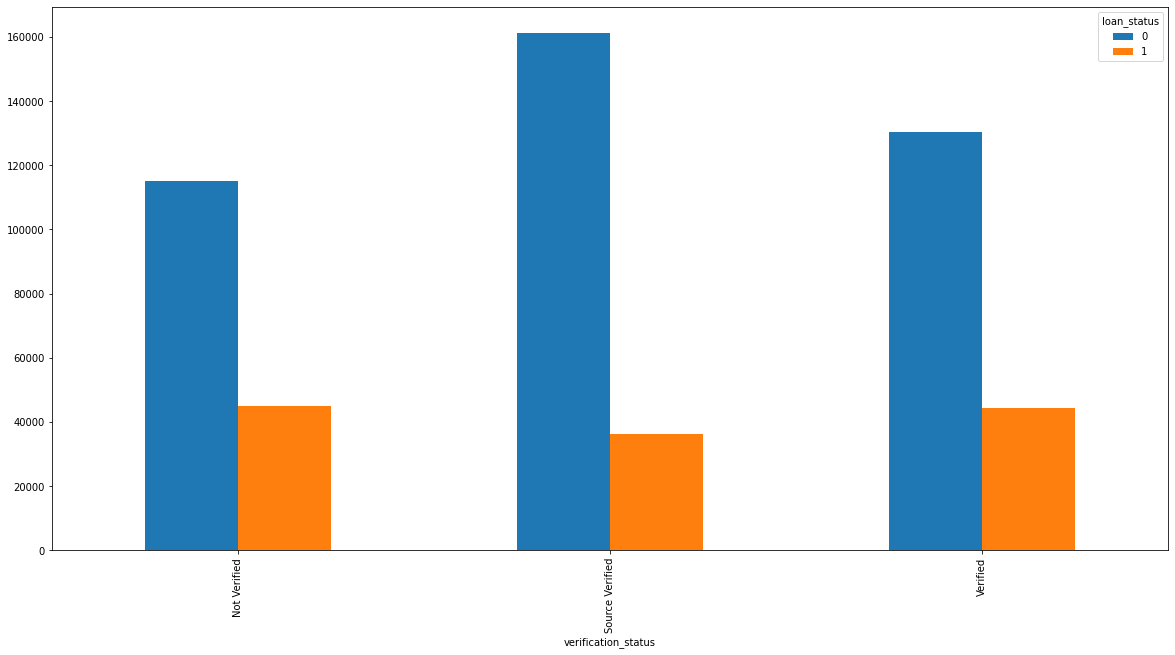

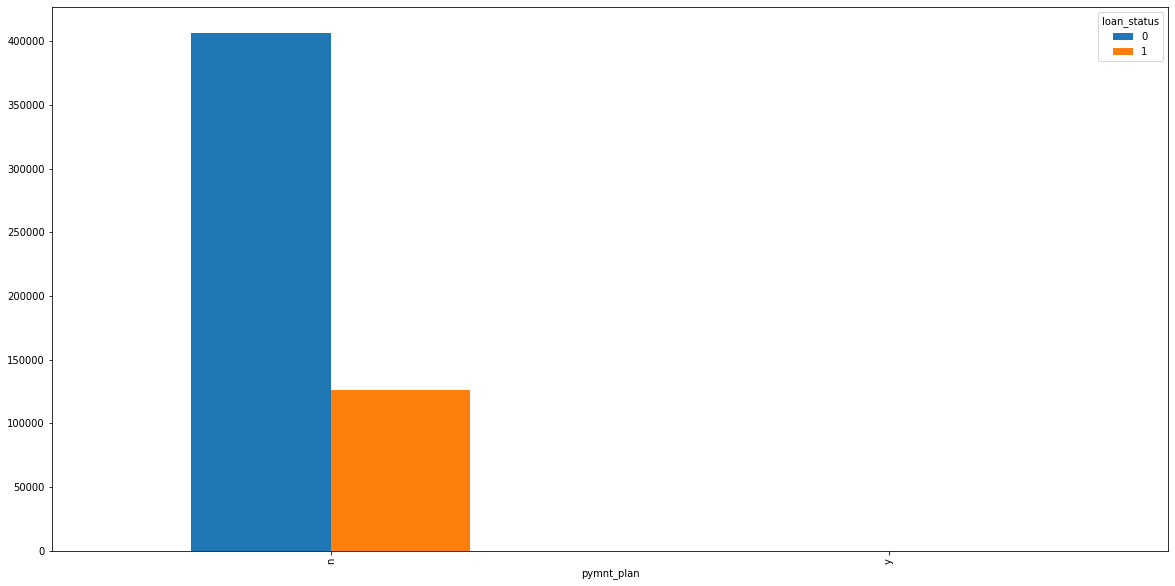

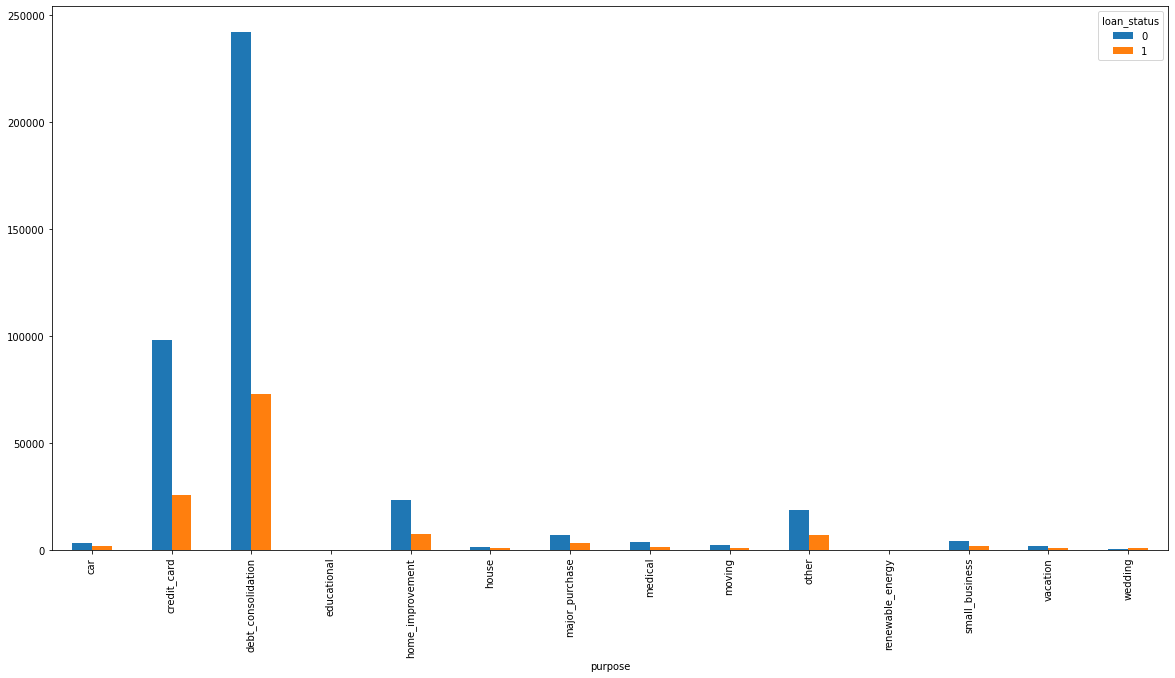

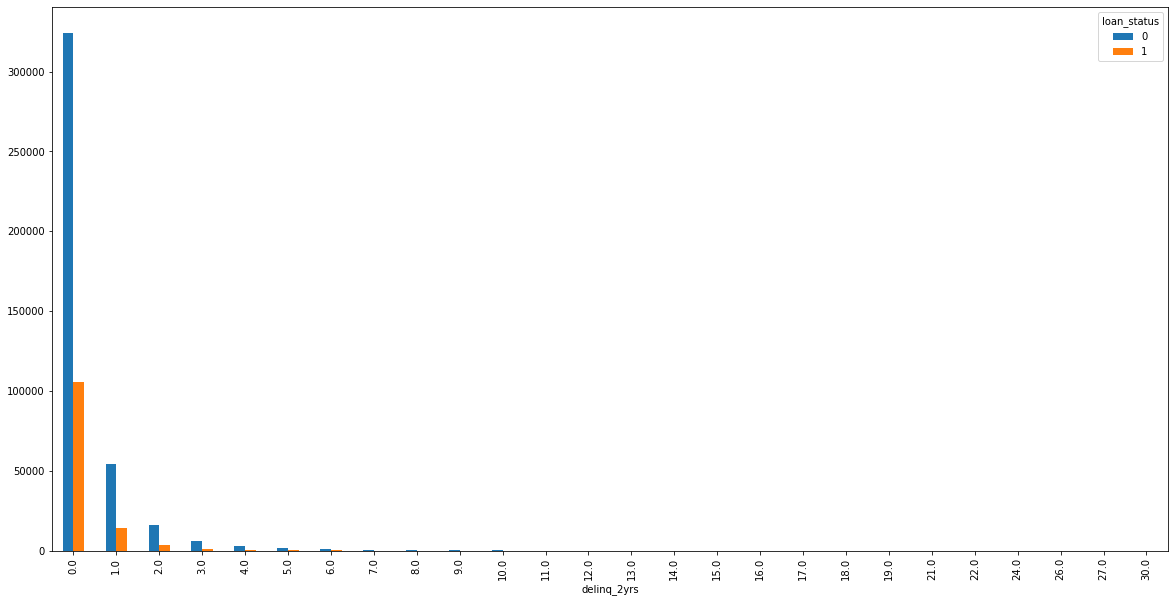

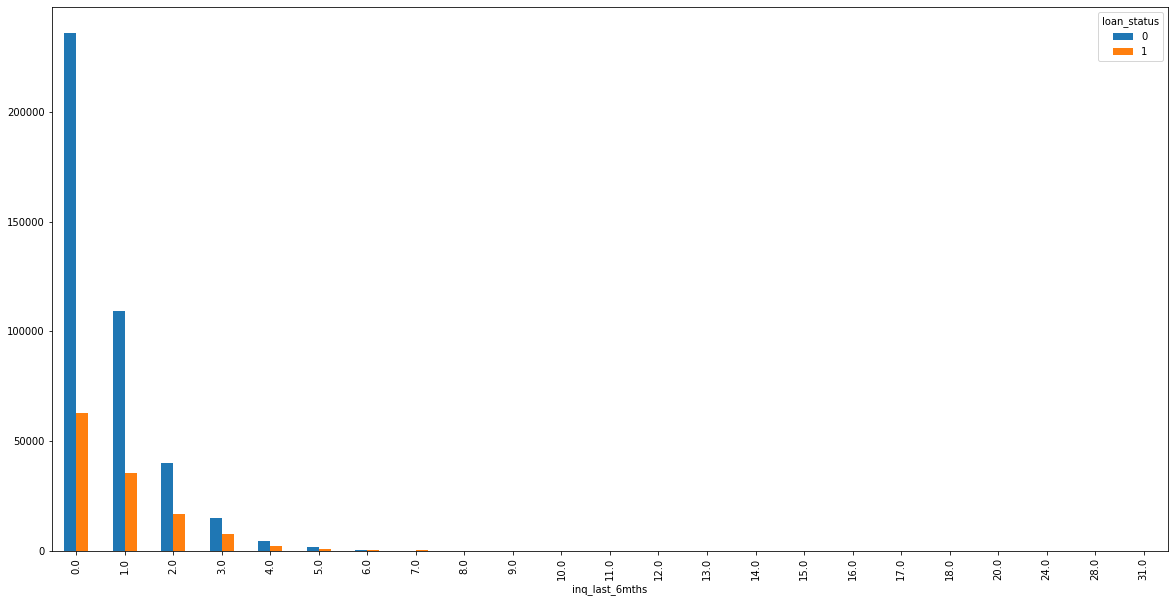

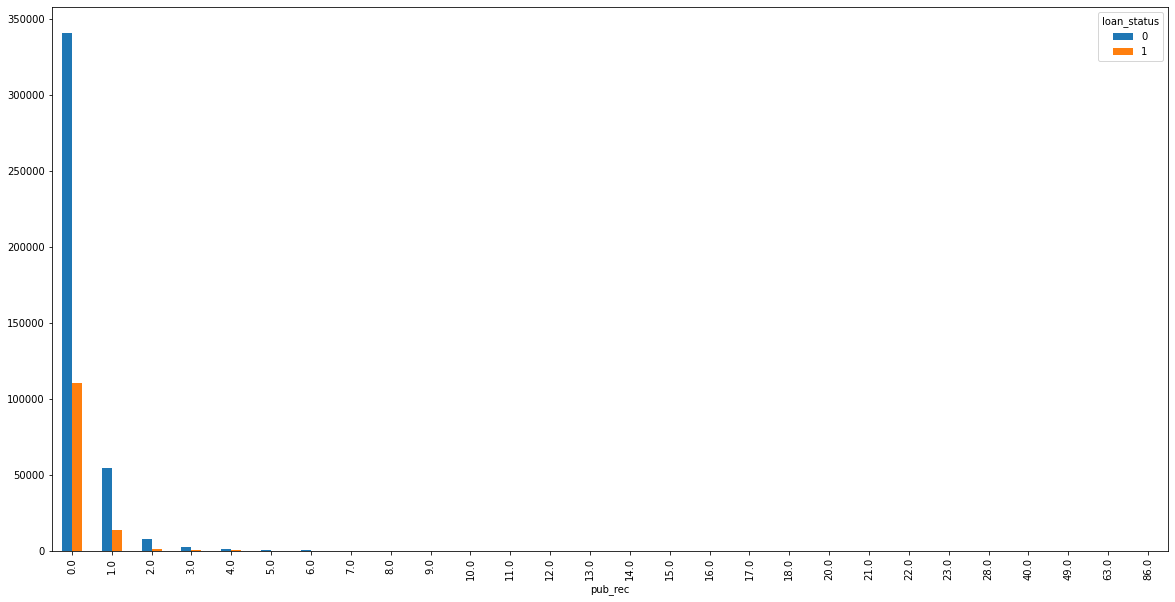

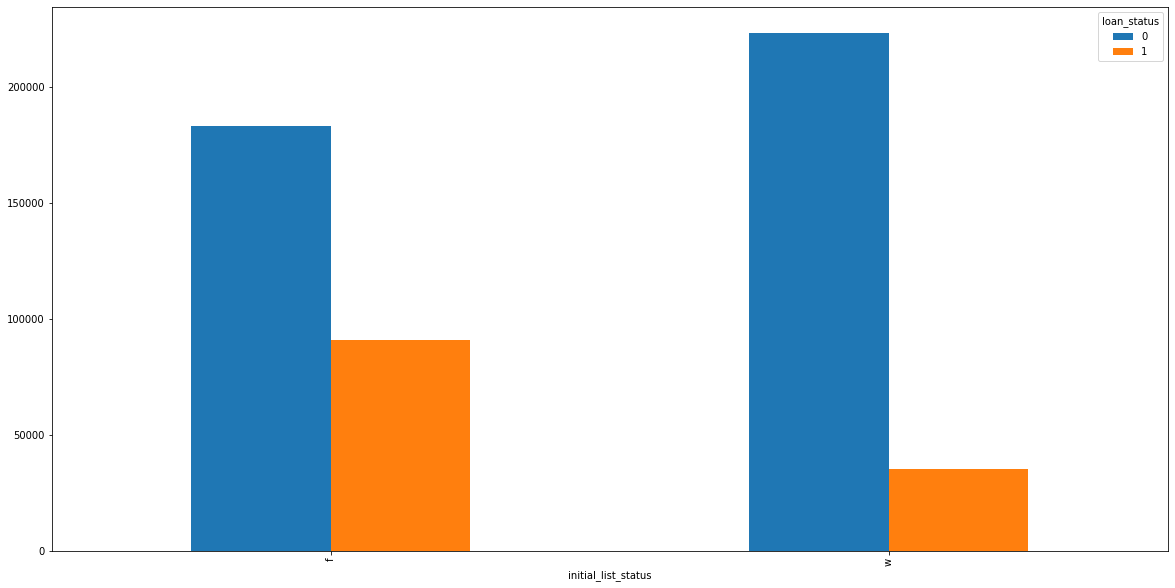

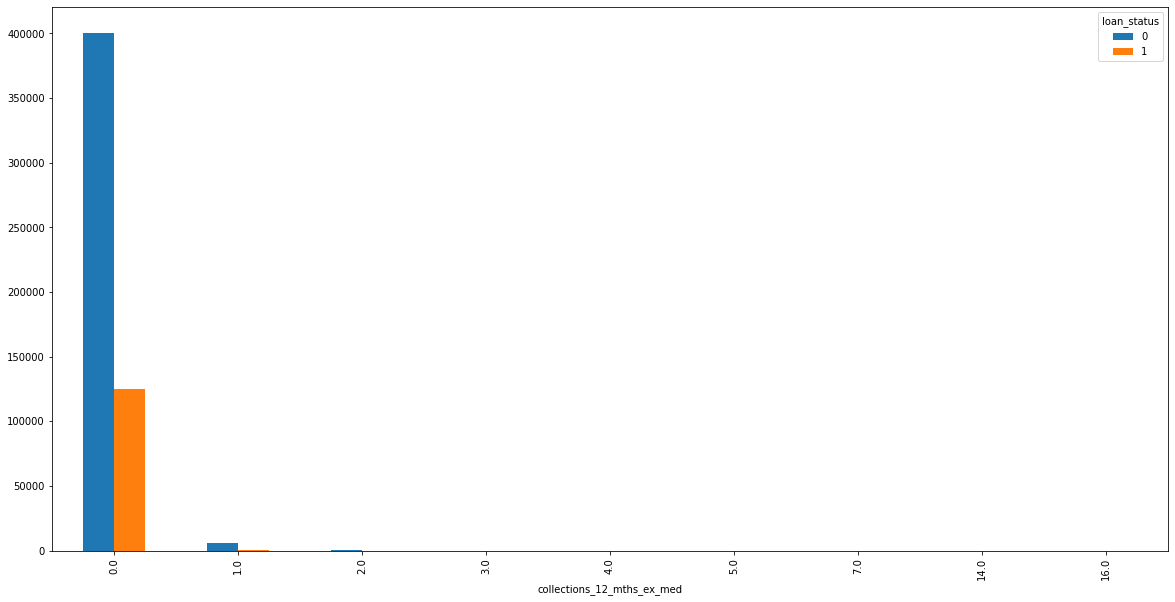

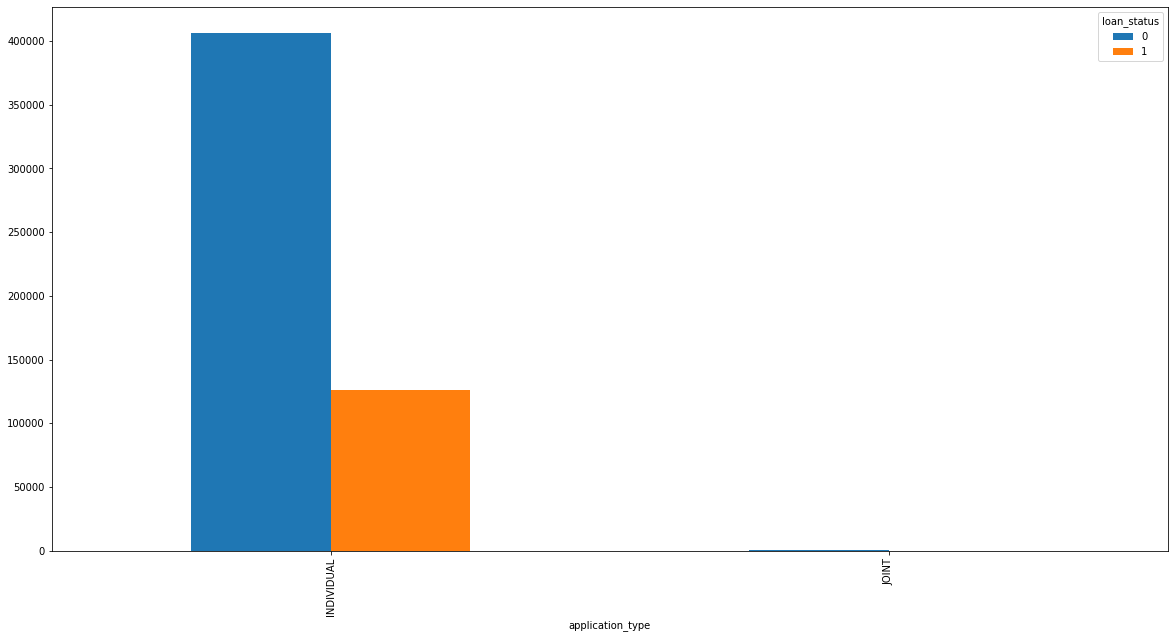

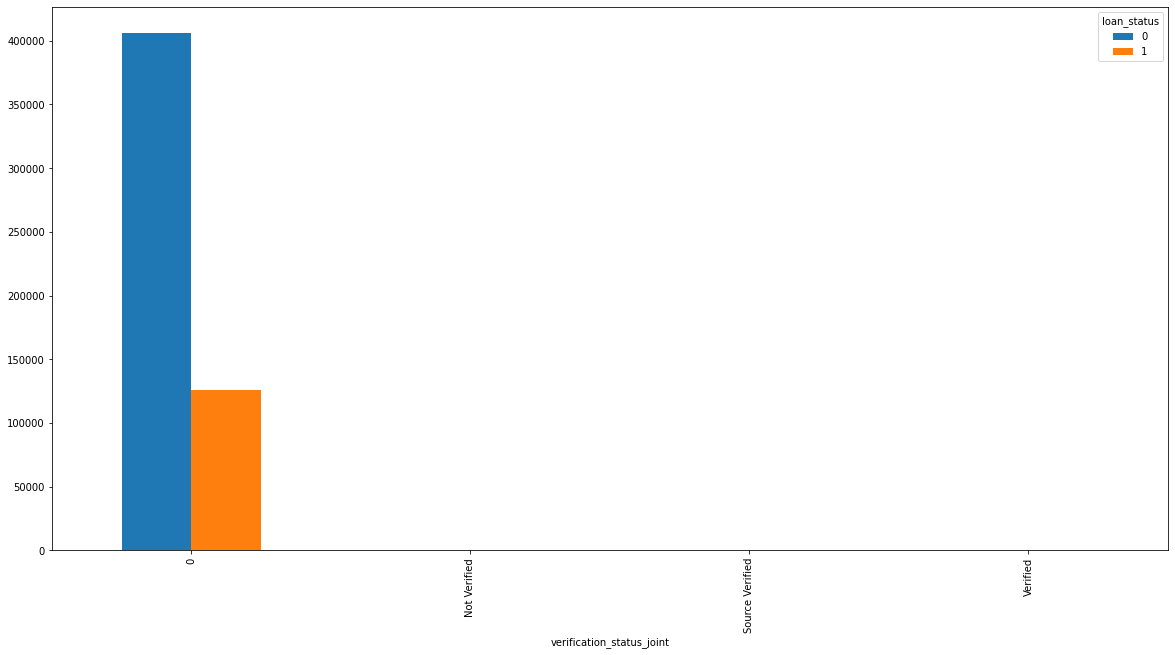

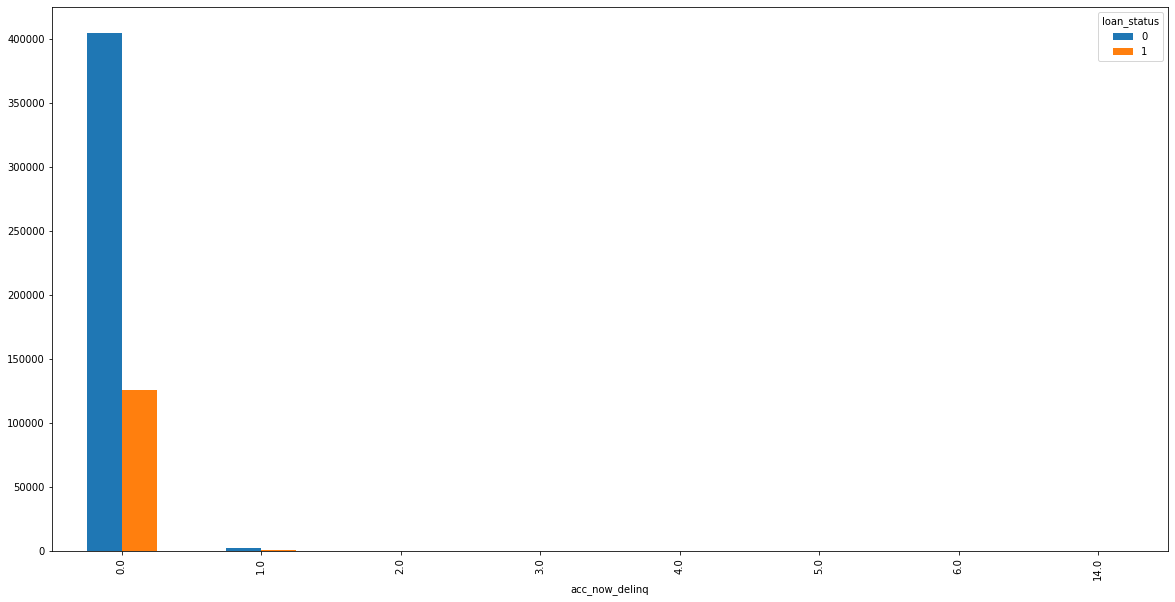

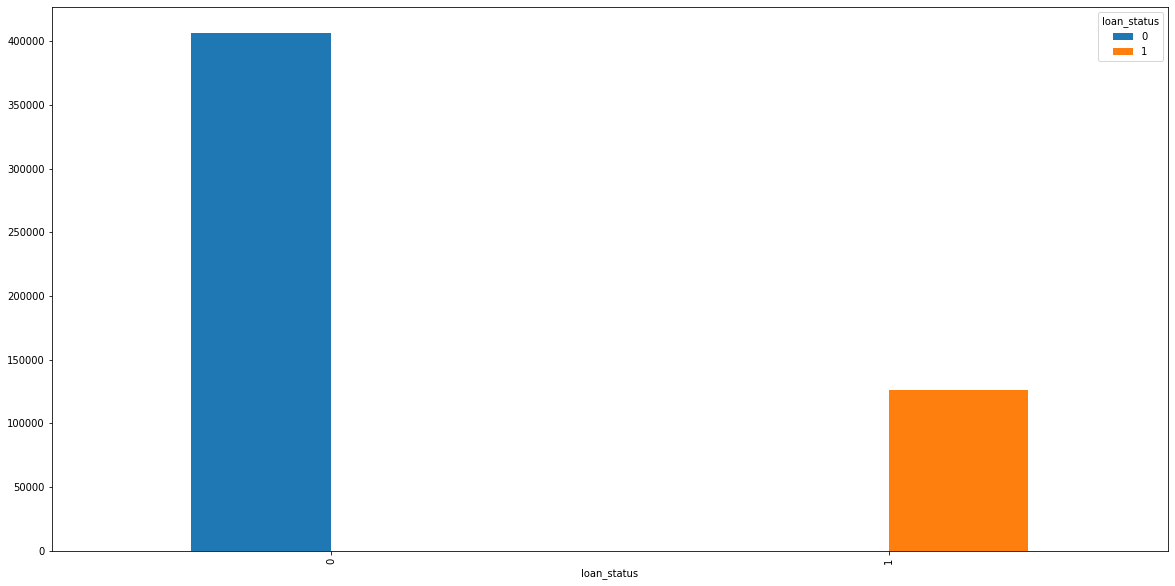

In [10]:
def relation_visualization(df):
    for columns in df.columns:
        if df[columns].dtype == np.object or len(df[columns].unique())<=30:
            print("Relationship between", columns, "and loan_status")
            relation = df.groupby(columns).loan_status.value_counts()
            print(relation.unstack())
            relation.unstack().plot(kind='bar',figsize=(20, 10))
relation_visualization(train_df3)   

##### Lets convert the columns with an 'object' datatype into categorical variables

In [11]:
# Convert object datatype feature into categorical variable using one hot encoding:
X_train = train_df3.drop("loan_status" , axis=1)
y_train = train_df3.pop("loan_status")
def categorical_fet(df):
    for features in df.columns: # Loop through all columns in the dataframe
        if df[features].dtype == 'object': # Only apply for columns with categorical strings
            df[features] = pd.Categorical(df[features]) # Replace strings with an integer
    return df
categorical_fet(X_train)
categorical_fet(test_df3)   

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14000,14000,14000.0,60 months,16.24,C,4 years,RENT,73500.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,85230.0,45700.0
1,16000,16000,16000.0,60 months,9.49,B,5 years,MORTGAGE,105000.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,444991.0,21400.0
2,11050,11050,11050.0,60 months,15.61,D,10+ years,RENT,62300.0,Not Verified,...,0.0,0.0,0.0,26.0,INDIVIDUAL,0,0.0,0.0,105737.0,16300.0
3,35000,35000,34700.0,60 months,12.69,C,10+ years,OWN,150000.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,287022.0,72400.0
4,6500,6500,6500.0,36 months,6.89,A,5 years,MORTGAGE,52000.0,Not Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,234278.0,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,15000,15000.0,36 months,6.49,A,1 year,MORTGAGE,97250.0,Not Verified,...,0.0,0.0,0.0,77.0,INDIVIDUAL,0,0.0,0.0,143920.0,44000.0
354947,35000,35000,35000.0,60 months,25.89,G,1 year,OWN,180000.0,Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,772713.0,85700.0
354948,14000,14000,13975.0,60 months,17.51,E,10+ years,OWN,56000.0,Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,0.0,0.0
354949,20000,20000,20000.0,36 months,7.26,A,< 1 year,MORTGAGE,100000.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,0,0.0,0.0,291998.0,54600.0


replacing the categories which can be ordered with integers and converting to one hot encoding those categories which can not be ordered

In [12]:
replaceStruct = {
    "term":     {"36 months": 1, "60 months": 2},
    "grade": {"A":1, "B":2 , "C":3, "D":4, "E":5, "F":6, "G":7},
    "emp_length": {"< 1 year":1, "1 year":2 , "2 years":3, "3 years":4, "4 years":5, "5 years":6, "6 years":7, "7 years":8, "8 years":9, "9 years":10, "10+ years":11},
    "pymnt_plan": {"n": 0, "y": 1},
    "initial_list_status":  {"f": 0, "w": 1 }
                }
oneHotCols=["home_ownership","verification_status","purpose","application_type","verification_status_joint"]

In [13]:
from sklearn.preprocessing import OneHotEncoder
X_train=X_train.replace(replaceStruct)
X_train=pd.get_dummies(X_train, columns=oneHotCols)

test_df3=test_df3.replace(replaceStruct)
test_df3=pd.get_dummies(test_df3, columns=oneHotCols)
print("Updated dimension of training data is: ",X_train.shape)
print("Updated dimension of test data is: ",test_df3.shape)

Updated dimension of training data is:  (532428, 59)
Updated dimension of test data is:  (354951, 58)


As seen from above that there is one column less in test data as compared to train data, check for that column

In [14]:
import copy
X_train1 = copy.deepcopy(X_train)
X_train1 = X_train1.drop(test_df3.columns, axis=1)
X_train1.head(1)

,home_ownership_ANY
0,0


So home_ownership_ANY is not present in train data droping that cilumn from train data to make the dimension of train and test data equal

In [15]:
X_train = X_train.drop(X_train1.columns, axis=1)
print("Updated dimension of training data is: ",X_train.shape)
print("Updated dimension of test data is: ",test_df3.shape)

Updated dimension of training data is:  (532428, 58)
Updated dimension of test data is:  (354951, 58)


In [18]:
from sklearn import preprocessing
#Scale the independent variables
X_train = preprocessing.scale(X_train)

### Split Data
Spliting train data into train (70%) and validation data (30%)

In [19]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train, y_train, test_size=.30, random_state=1)
print("Dimension of X_train_final data is: ",X_train_final.shape, "Dimension of y_train_final data is: ",y_train_final.shape)
print("Dimension of X_val_final data is: ",X_val_final.shape, "Dimension of y_val_final data is: ",y_val_final.shape)

Dimension of X_train_final data is:  (372699, 58) Dimension of y_train_final data is:  (372699,)
Dimension of X_val_final data is:  (159729, 58) Dimension of y_val_final data is:  (159729,)


In [20]:
from sklearn.metrics import roc_auc_score
import time

### Build Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
StartTrain_DT = time.time()
dTree.fit(X_train_final, y_train_final)
EndTrain_DT = time.time()
TrainTime_DT = EndTrain_DT - StartTrain_DT

StartPred_DT = time.time()
dT_y_predict_test = dTree.predict(test_df3)
EndPred_DT = time.time()
PredTime_DT = EndPred_DT - StartPred_DT

DT_train_score = dTree.score(X_train_final, y_train_final)
print("Accuracy score on training data using decision tree: ",DT_train_score)
DT_val_score = dTree.score(X_val_final, y_val_final)
print("Accuracy score on validation data using decision tree: ",DT_val_score)
# predict probabilities
dT_y_predict_val = dTree.predict_proba(X_val_final)
# keep probabilities for the positive outcome only
dT_y_predict_val = dT_y_predict_val[:, 1]
# calculate AUC-ROC scores
DT_roc_auc_score = roc_auc_score(y_val_final, dT_y_predict_val) 
print("AUC-ROC score on validation data using decision tree: ",DT_roc_auc_score)

Accuracy score on training data using decision tree:  0.8188189396805465
Accuracy score on validation data using decision tree:  0.8200264197484489
AUC-ROC score on validation data using decision tree:  0.7482976655853959


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(solver="liblinear")
StartTrain_LR = time.time()
Log_reg.fit(X_train_final, y_train_final)
EndTrain_LR = time.time()
TrainTime_LR = EndTrain_LR-StartTrain_LR

StartPred_LR = time.time()
LR_y_predict_test = Log_reg.predict(test_df3)
EndPred_LR = time.time()
PredTime_LR = EndPred_LR-StartPred_LR

LR_train_score = Log_reg.score(X_train_final, y_train_final)
print("Accuracy score on training data using logistic regression: ", LR_train_score)
LR_val_score = Log_reg.score(X_val_final, y_val_final)
print("Accuracy score on validation data using logistic regression: ", LR_val_score)
# predict probabilities
LR_y_predict_val = Log_reg.predict_proba(X_val_final)
# keep probabilities for the positive outcome only
LR_y_predict_val = LR_y_predict_val[:, 1]
# calculate AUV-ROC scores
LR_roc_auc_score = roc_auc_score(y_val_final, LR_y_predict_val)
print("AUC-ROC score on validation data using logistic regression: ", LR_roc_auc_score)

Accuracy score on training data using logistic regression:  0.8033506931867271
Accuracy score on validation data using logistic regression:  0.8039679707504586
AUC-ROC score on validation data using logistic regression:  0.7795118723341636


### Naive Bayes algorithm

In [24]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
Naive_bayes = GaussianNB()
StartTrain_NB = time.time()
Naive_bayes.fit(X_train_final, y_train_final)
EndTrain_NB = time.time()
TrainTime_NB = EndTrain_NB-StartTrain_NB

StartPred_NB = time.time()
NB_y_predict_test = Naive_bayes.predict(test_df3)
EndPred_NB = time.time()
PredTime_NB = EndPred_NB-StartPred_NB

NB_train_score = Naive_bayes.score(X_train_final, y_train_final)
print("Accuracy score on training data using Naive Bayes: ", NB_train_score)
NB_val_score = Naive_bayes.score(X_val_final, y_val_final)
print("Accuracy score on validation data using Naive Bayes: ", NB_val_score)
# predict probabilities
NB_y_predict_val = Naive_bayes.predict_proba(X_val_final)
# keep probabilities for the positive outcome only
NB_y_predict_val = NB_y_predict_val[:, 1]
# calculate AUV-ROC scores
NB_roc_auc_score = roc_auc_score(y_val_final, NB_y_predict_val)
print("AUC-ROC score on validation data using Naive Bayes: ", NB_roc_auc_score)

Accuracy score on training data using Naive Bayes:  0.2782030539389695
Accuracy score on validation data using Naive Bayes:  0.27755135260347213
AUC-ROC score on validation data using Naive Bayes:  0.5325071106200022


### Neural networks classifiers

In [25]:
import tensorflow as tf
from tensorflow.keras import losses, regularizers
from tensorflow.keras.layers import Flatten, LeakyReLU

In [26]:
NN_model = tf.keras.Sequential()
NN_model.add(tf.keras.layers.Dense(activation = tf.keras.layers.LeakyReLU(alpha=0.1), kernel_initializer = "uniform", units =6, input_dim = X_train_final.shape[1]))
NN_model.add(tf.keras.layers.Dropout(0.1))
NN_model.add(tf.keras.layers.Dense(activation = tf.keras.layers.LeakyReLU(alpha=0.1), kernel_initializer = "uniform", units =6))
NN_model.add(Flatten())
NN_model.add(tf.keras.layers.Dense(activation='sigmoid',kernel_initializer = "uniform", units =1))

NN_model.summary()
NN_model.compile(optimizer='adam', loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 354       
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [27]:
StartTrain_NN = time.time()
NN_model.fit(np.array(X_train_final), np.array(y_train_final), epochs= 20, batch_size=64)
EndTrain_NN = time.time()
TrainTime_NN = EndTrain_NN - StartTrain_NN 

Epoch 1/20
5824/5824 [==============================] - 92s 15ms/step - loss: 0.4890 - accuracy: 0.7825
Epoch 2/20
5824/5824 [==============================] - 88s 15ms/step - loss: 0.4403 - accuracy: 0.8079
Epoch 3/20
5824/5824 [==============================] - 89s 15ms/step - loss: 0.4357 - accuracy: 0.8109
Epoch 4/20
5824/5824 [==============================] - 89s 15ms/step - loss: 0.4334 - accuracy: 0.8105
Epoch 5/20
5824/5824 [==============================] - 89s 15ms/step - loss: 0.4308 - accuracy: 0.8125
Epoch 6/20
5824/5824 [==============================] - 87s 15ms/step - loss: 0.4308 - accuracy: 0.8108
Epoch 7/20
5824/5824 [==============================] - 86s 15ms/step - loss: 0.4268 - accuracy: 0.8117
Epoch 8/20
5824/5824 [==============================] - 86s 15ms/step - loss: 0.4244 - accuracy: 0.8141
Epoch 9/20
5824/5824 [==============================] - 88s 15ms/step - loss: 0.4224 - accuracy: 0.8156
Epoch 10/20
5824/5824 [==============================] - 88s 15m

In [33]:
# Evaluate the model on the validation data using `evaluate`
NN_acc_train = 0.8172 # found from above
print("Evaluate neural network classifier model on validation data")
NN_loss_val, NN_acc_val = NN_model.evaluate(np.array(X_val_final), np.array(y_val_final))
print("\nNN validation loss: ", NN_loss_val, "NN validation acc: ", NN_acc_val)

Evaluate neural network classifier model on validation data
4992/4992 [==============================] - 43s 9ms/step - loss: 0.4098 - accuracy: 0.8202

NN validation loss:  0.4097580313682556 NN validation acc:  0.8201829195022583


In [32]:
# predict probabilities
NN_y_predict_val = NN_model.predict_proba(np.array(X_val_final))
NN_predict_val = NN_y_predict_val.argmax(axis=1)

# calculate AUV-ROC scores
NN_roc_auc_score = roc_auc_score(np.array(y_val_final), NN_predict_val)
print("AUC-ROC score on validation data using Neural Network: ", NN_roc_auc_score)

# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
StartPred_NN = time.time()
NN_predictions = NN_model.predict(np.array(test_df3))
NN_predict_results = NN_predictions.argmax(axis=1)
EndPred_NN = time.time()
PredTime_NN = EndPred_NN - StartPred_NN

AUC-ROC score on validation data using Neural Network:  0.5


### Comparison table

In [37]:
data = [[TrainTime_DT, PredTime_DT, DT_train_score, DT_val_score, DT_roc_auc_score],
        [TrainTime_LR, PredTime_LR, LR_train_score, LR_val_score, LR_roc_auc_score],
        [TrainTime_NB, PredTime_NB, NB_train_score, NB_val_score, NB_roc_auc_score],
        [TrainTime_NN, PredTime_NN, NN_acc_train, NN_acc_val, NN_roc_auc_score]]
Comp_table = pd.DataFrame(data,columns=['train_time(sec)','Prediction_time(sec)', 'train_accuracy', 'validation_accuracy', 'roc_auc_score'],
                          index=['Decision_tree','Logistic_regression','Naive_Bayes','Neural_network'])
Comp_table   

,train_time(sec),Prediction_time(sec),train_accuracy,validation_accuracy,roc_auc_score
Decision_tree,8.419761,0.267902,0.818819,0.820026,0.748298
Logistic_regression,66.209298,0.187448,0.803351,0.803968,0.779512
Naive_Bayes,0.726396,0.946104,0.278203,0.277551,0.532507
Neural_network,1742.705883,26.055485,0.817200,0.820183,0.500000


It can be concluded from above:
    1. Neural network has maximum validation accuracy but it takes long time to train and it roc_auc_score is low so it can not be used in production.
    2. Decision tree has high validation accuracy but it has lower roc_auc score compared to logistic regression.
    3. Logistic regression has lower validation accuracy but highest roc_auc score so logistic regression is best for production.